Dataset Shape: (200, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   200 non-null    object        
 1   Age                    200 non-null    int64         
 2   Gender                 200 non-null    object        
 3   Projects Completed     200 non-null    int64         
 4   Productivity (%)       200 non-null    int64         
 5   Satisfaction Rate (%)  200 non-null    int64         
 6   Feedback Score         200 non-null    float64       
 7   Department             200 non-null    object        
 8   Position               200 non-null    object        
 9   Joining Date           200 non-null    datetime64[ns]
 10  Salary                 200 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 17.3+ KB
None


C:\Users\pavan\AppData\Local\Temp\ipykernel_44684\2353976236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_prod, x='Department', y='Productivity (%)', palette='viridis')


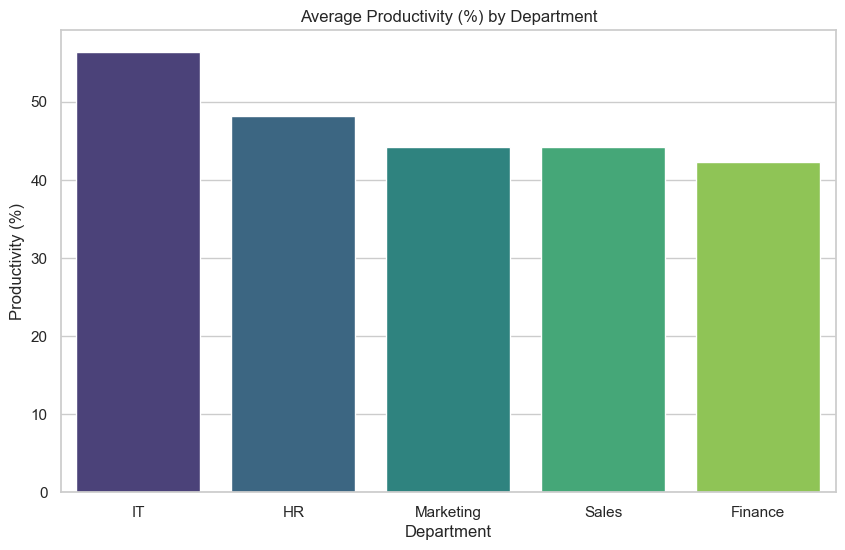

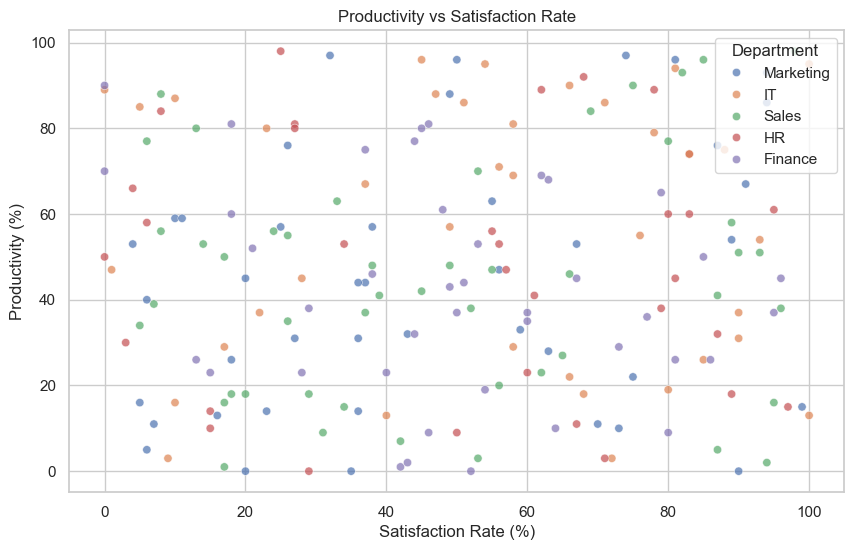

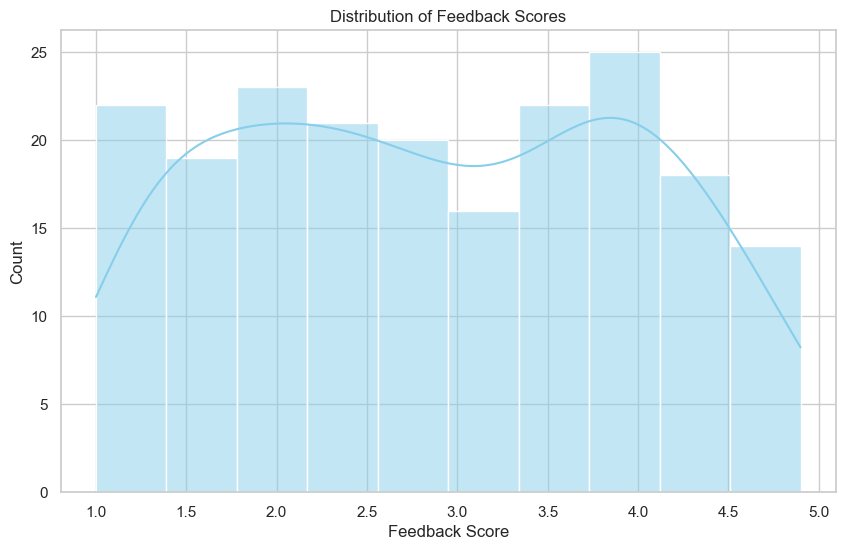

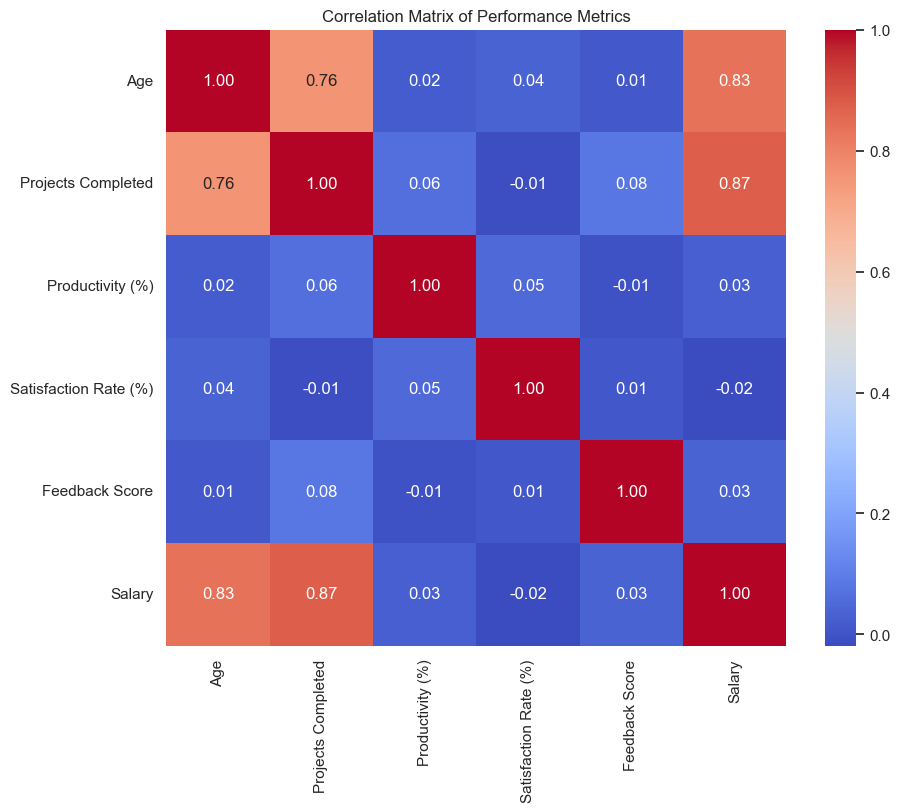

Cleaned data saved to 'cleaned_hr_data.csv'


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hr_dashboard_data.csv')
df
df['Joining Date'] = pd.to_datetime(df['Joining Date'], format='%b-%y')

# Display basic info
print("Dataset Shape:", df.shape)
print(df.info())

# 3. Data Exploration & Visualizations
sns.set(style="whitegrid")

# Plot 1: Average Productivity by Department
plt.figure(figsize=(10, 6))
dept_prod = df.groupby('Department')['Productivity (%)'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=dept_prod, x='Department', y='Productivity (%)', palette='viridis')
plt.title('Average Productivity (%) by Department')
plt.show()

# Plot 2: Productivity vs Satisfaction Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Satisfaction Rate (%)', y='Productivity (%)', hue='Department', alpha=0.7)
plt.title('Productivity vs Satisfaction Rate')
plt.show()

# Plot 3: Distribution of Feedback Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Feedback Score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Feedback Scores')
plt.show()

# Plot 4: Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 4. Save Cleaned Data
df.to_csv('cleaned_hr_data.csv', index=False)
print("Cleaned data saved to 'cleaned_hr_data.csv'")